## Import
Nous utiliserons un stack de Data Science habituelle : `numpy`, `pandas`, `sklearn`, `matplotlib`.

In [18]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Import du Dataset
Tout d’abord, nous pouvons lister tous les fichiers de données disponibles. Il y a au total 10 fichiers : 1 fichier principal pour l'entrainement (avec cible), 1 fichier principal pour les tests (sans la cible), 1 exemple de fichier de soumission et 7 autres fichiers contenant des informations supplémentaires sur chaque prêt.

In [19]:
# List files available
print(os.listdir("./Home_Credit_Default_Risk/"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [20]:
# Training data
app_train = pd.read_csv('./Home_Credit_Default_Risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Les données d'entraînement contiennent 307 511 observations (chacune étant un emprunt distinct) et 122 caractéristiques (variables), y compris la `TARGET` (l'étiquette que nous voulons prédire).

In [21]:
# Testing data features
app_test = pd.read_csv('./Home_Credit_Default_Risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


L'ensemble de tests est considérablement plus petit et ne dispose pas de colonne `TARGET`.

# Analyse exploratoire des données
L'analyse exploratoire des données (AED) est un processus dans lequel nous calculons des statistiques et réalisons des opérations pour trouver les tendances, les anomalies, les modèles ou les relations au sein des données. L’objectif de l’AED est d’apprendre ce que les données peuvent nous raconter. Cela commence généralement par un aperçu préliminaire, puis nous nous concentrons sur des domaines spécifiques à mesure que nous trouvons des domaines de données intéressant pour notre étude. Les résultats peuvent être intéressants en eux-mêmes, ou ils peuvent être utilisés pour éclairer nos choix de modélisation, par exemple en nous aidant à décider quelles fonctionnalités utiliser.

## Examen de la distribution de la colonne TARGET
L'objectif est de pouvoir prédire : soit un 0 pour le prêt remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d’abord examiner le nombre de prêts entrant dans chaque catégorie.

In [22]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

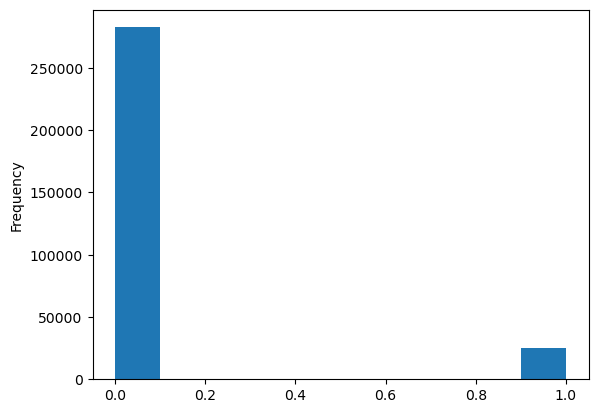

In [23]:
app_train['TARGET'].astype(int).plot.hist();

À partir de ces informations, nous voyons qu'il s'agit d'un [_problème de déséquilibre de classe_](https://www.aquiladata.fr/insights/comment-gerer-le-desequilibre-des-classes-dans-un-jeu-de-donnees/). Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons [pondérer les classes](https://kobia.fr/imbalanced-data-et-machine-learning/) par leur représentation dans les données pour refléter ce déséquilibre.

## Examen des valeurs manquantes
Ensuite, nous pouvons examiner le nombre et le pourcentage de valeurs manquantes dans chaque colonne.

In [24]:
# Fonction permettant de calculer les valeurs manquantes par colonne
def missing_values_table(df):
        # Total de valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Percentage de valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Créer un tableau des résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Changer le nom des colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% de valeurs manquantes'})
        
        # Trier le tableau par ordre décroissant 
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% de valeurs manquantes', ascending=False).round(1)
        
        # Affichage des informations 
        print ("Le Dataframe a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Return le tableau des valeurs manquantes
        return mis_val_table_ren_columns

In [25]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Le Dataframe a 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,% de valeurs manquantes
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Lorsque nous instancierons nos modèles d’apprentissage automatique, nous pourrons combler ces valeurs manquantes (appelée imputation). Dans des travaux ultérieurs, nous utiliserons des modèles tels que XGBoost qui peuvent [gérer les valeurs manquantes sans nécessiter d'imputation](https://datascientest.com/xgboost-grand-gagnant-des-competitions-machine-learning-algorithme). Une autre option consisterait à supprimer les colonnes avec un pourcentage élevé de valeurs manquantes, bien qu'il soit impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle. Par conséquent, nous conserverons toutes les colonnes pour le moment.

## Type des variables
Regardons le nombre de variables de chaque type de données. `int64` et `float64` sont des variables numériques ([qui peuvent être discrètes ou continues](https://support.minitab.com/fr-fr/minitab/21/help-and-how-to/statistical-modeling/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)). Les variables `object` contiennent des chaînes et sont des [caractéristiques catégorielles.](https://datascience.eu/fr/mathematiques-et-statistiques/donnees-categorielles/) .

In [26]:
# Nombre de variables par type
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Examinons maintenant le nombre d'entrées uniques dans chacune des colonnes `objet`(catégorielle).

In [27]:
# Nombre d'entrée unique par colonne
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement faible d'entrées uniques. Nous devrons trouver un moyen de gérer ces variables catégorielles.

## Encodage des variables catégorielles
Avant d’aller plus loin, nous devons traiter des variables catégorielles. Un modèle d'apprentissage automatique ne peut malheureusement pas gérer des variables catégorielles (sauf pour certains modèles tels que [LightGBM](https://pro.arcgis.com/fr/pro-app/latest/tool-reference/geoai/how-lightgbm-works.htm#:~:text=LightGBM%20est%20une%20m%C3%A9thode%20d,la%20classification%20et%20la%20r%C3%A9gression.)). Par conséquent, nous devons trouver un moyen d'encoder (représenter) ces variables sous forme de nombres avant de les transmettre au modèle. Il existe deux manières principales de réaliser ce processus :

* Encodage des étiquettes : attribuez à chaque catégorie unique une variable catégorielle avec un entier. Aucune nouvelle colonne n'est créée. Un exemple est montré ci-dessous

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

* Encodage One-Hot: créez une nouvelle colonne pour chaque catégorie unique dans une variable catégorielle. Chaque observation reçoit un 1 dans la colonne pour sa catégorie correspondante et un 0 dans toutes les autres nouvelles colonnes.

![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)

Le problème avec l'encodage des étiquettes est qu’il donne aux catégories un ordre arbitraire. La valeur attribuée à chacune des catégories est aléatoire et ne reflète aucun aspect inhérent à la catégorie. Dans l'exemple ci-dessus, le programmeur reçoit un 4 et le data scientist un 1, mais si nous refaisons le même processus, les étiquettes pourraient être inversées ou complètement différentes. L'affectation réelle des entiers est arbitraire. Par conséquent, lorsque nous effectuons un encodage d'étiquettes, le modèle peut utiliser la valeur relative de la caractéristique (par exemple programmeur = 4 et data scientist = 1) pour attribuer des poids qui ne correspondent pas à ce que nous souhaitons. Si nous n'avons que deux valeurs uniques pour une variable catégorielle (telle que Homme/Femme), alors l'encodage des étiquettes est correct, mais pour plus de 2 catégories uniques, l'encodage One-Hot est l'option la plus sûre.

Il existe un certain débat sur les mérites relatifs de ces approches, et certains modèles peuvent traiter sans problème des variables catégorielles codées par des étiquettes. [Voici une bonne discussion sur Stack Overflow](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). Mon opinion est que pour les variables catégorielles avec de nombreuses classes, l'encodage One-Hot est l'approche la plus pertinente car elle n'impose pas de valeurs arbitraires aux catégories. Le seul inconvénient de l'encodage One-Hot est que le nombre de caractéristiques (dimensions des données) peut s'accroitre rapidement avec des variables catégorielles comportant de nombreuses catégories. Pour résoudre ce problème, nous pouvons effectuer un encodage One-Hot suivi d'une [ACP](https://datascientest.com/acp) ou d'autres [méthodes de réduction de dimensionnalité](https://dataanalyticspost.com/Lexique/reduction-de-dimensionnalite/) pour réduire le nombre de dimensions (tout en essayant de préserver les informations).

Dans ce Notebook, nous utiliserons l'encodage des étiquettes pour toutes les variables catégorielles avec seulement 2 catégories et l'encodage One-Hot pour toutes les variables catégorielles avec plus de 2 catégories. Ce processus devra peut-être changer à mesure que nous avancerons dans le projet.

## Encodate par étiquettes et encodage One-Hot
Implémentons la méthode décrite ci-dessus : pour toute variable catégorielle (`dtype == object`) avec 2 catégories uniques, nous utiliserons l'encodage par étiquette, et pour toute variable catégorielle avec plus de 2 catégories uniques, nous utiliserons l'encodage one-hot.

Pour l'encodage des étiquettes, nous utilisons le `LabelEncoder` de `Scikit-Learn` et pour l'encodage one-Hot, la fonction `get_dummies(df)` de `pandas`. 

In [28]:
# Création de l'encodeur d'étiquette
le = LabelEncoder()
le_count = 0

# Itérer sur les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # si il y a 2 ou moins de catégorie unique
        if len(list(app_train[col].unique())) <= 2:
            # on applique l'encodeur d'étiquettes sur les données
            le.fit(app_train[col])
            # on applique l'encodeur sur les dataset de test et d'entrainement
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # on conserve le nombre de colonne encodé par étiquettes
            le_count += 1
            
print('%d colonnes encodées par étiquette.' % le_count)

3 colonne encodé par étiquette.


In [29]:
# Encodage One-Hot des autres variables catégorielles
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## Aligner les données de test et d'entrainement
Il doit y avoir les mêmes features (colonnes) dans les données d'entrainement et de test. L'encodage One-Hot a créé davantage de colonnes dans les données d'entraînement, car certaines variables catégorielles n'étaient pas représentées dans les données de test. Pour supprimer les colonnes des données d'entraînement qui ne figurent pas dans les données de test, nous devons aligner les dataframes. Nous extrayons d’abord la colonne `TARGET`
 des données d’entraînement (car elle ne figure pas dans les données de test mais nous devons conserver ces informations). Lorsque nous effectuons l'alignement, nous devons nous assurer de définir `axis = 1` pour aligner les dataframes en fonction des colonnes et non des lignes.

In [30]:
train_labels = app_train['TARGET']

# Aligne les données d'entrainement et de test, conserve les colonnes présentes dans les 2 dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Remettre la colonne Target dans le dataset
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Le dataset d'entrainement et le dataset de test ont désormais les mêmes features requises pour l'apprentissage automatique. Le nombre de features a considérablement augmenté en raison de l'encodage One-Hot. Nous devrons probablement essayer de [réduire la dimensionnalité (supprimer les features qui ne sont pas pertinentes)](ol-reference/spatial-statistics/how-dimension-reduction-works.htm#:~:text=La%20réduction%20des%20dimensions%20est,de%20dimensions%20dans%20les%20données.) pour réduire la taille des Dataset.

## Analyse exploratoire des données
### Anomalies
Un détail a surveiller lors d'une AED est le cas des données aberrantes ou atypique. Cela peut être dû à des chiffres mal saisis, à des erreurs dans l'équipement de mesure ou à des mesures valides mais atypique. Une façon de prendre en charge quantitativement les anomalies consiste à examiner les statistiques d'une colonne à l'aide de la méthode `describe`. Nous pouvons analyser la répartition des valeurs des différentes variables en commençant par `DAYS_BIRTH`. Les nombres dans cette variable sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Pour voir ces statistiques en années, nous pouvons multiplier par -1 et diviser par le nombre de jours dans une année :

In [31]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Les âges des individus semblent raisonnables. Il n’y a pas de valeurs aberrantes pour la variable âge. Analysons la répartition des valeurs de la variables `DAYS_EMPLOYED`.

In [32]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

La répartition des valeurs de cette variable ne semble pas être correcte, on constate des valeurs négative en plus des valeurs aberrantes.

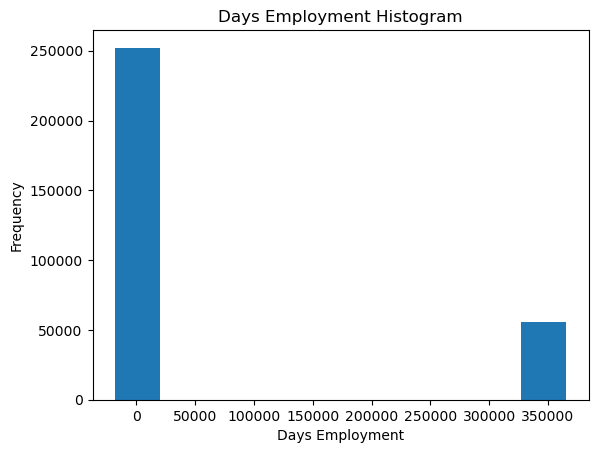

In [33]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Nous observons les données aberrantes pour voir si le taux de défaut est plus important parmis elle que parmis les autres.

In [34]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print("Le pourcentage de défaut parmis les données non-aberrantes est de %0.2f%% de l'ensemble des crédits" % (100 * non_anom['TARGET'].mean()))
print("Le pourcentage de défaut parmis les données aberrantes est de %0.2f%% de l'ensemble des crédits" % (100 * anom['TARGET'].mean()))
print('Il y a %d valeurs aberrantes' % len(anom))

Le pourcentage de défaut parmis les données non-aberrantes est de 8.66% de l'ensemble des crédits
Le pourcentage de défaut parmis les données aberrantes est de 5.40% de l'ensemble des crédits
Il y a 55374 valeurs aberrantes


Nous pouvons constater que les individus ayant des valeurs aberrantes ont une taux de défaut plus faible que les autres.

La gestion des valeurs aberrantes dépend du contexte, sans règles définies, l'une des approches les plus pertinentes consiste à définir les valeurs aberrantes sur une valeur manquante, puis à les remplacer (à l'aide de l'imputation) avant d'utiliser un algorithme de Machine Learning. Dans ce cas, puisque toutes les valeurs aberrantes ont exactement la même valeur, nous les remplacerons avec la même valeur dans le cas où tous ces prêts auraient une raison particulière de partager cette valeur aberrante. Les valeurs aberrante semblent avoir une intérêt particulier, nous souhaitons indiquer au modèle de Machine Learning les individus qui possèdaient ou non une valeur aberrante. Nous remplirons donc les valeurs aberrantes avec une valeur manquante (np.nan), puis nous créerons une nouvelle colonne booléenne indiquant si la valeur était aberrante ou non.

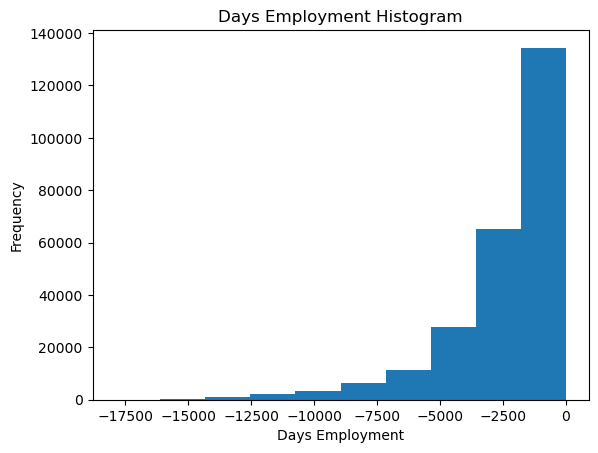

In [35]:
# Créer une colonne pour signaler si l'individu possèdaient une valeur aberrante
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplacement des valeurs aberrantes par des nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours travaillés');
plt.xlabel('Jours travaillés');

La distribution semble être plus conforme à ce à quoi nous nous attendions, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient à l'origine aberrante.

Il est important de noter que tout ce que nous faisons avec les données d'entraînement, nous devons également le faire avec les données de test. Assurons-nous de créer une nouvelle colonne et de remplacer les valeurs aberrantes de la colonne `DAYS_EMPLOYED` avec `np.nan` dans les données de test.

In [36]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d valeurs aberrantes %d individus dans le jeu de test' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'AED. Une façon d’essayer de comprendre les données consiste à rechercher des corrélations entre les variables et la `TARGET`. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la `TARGET` en utilisant la méthode dataframe `.corr`.

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la pertinence d'une variable, mais il nous donne une idée des relations possibles au sein des données. Certaines [interprétations générales de la valeur absolue du coefficient de corrélation] (https://www.nagwa.com/fr/explainers/143190760373/) sont :

* .00-.19 “Aucune corrélation”
*  .20-.39 “Faible corrélation”
*  .40-.59 “Corrélation modérée”
*  .60-.79 “Forte corrélation”
* .80-1.0 “Très forte corrélation”

In [37]:
# Trouver les corrélation avec la target et les trier par ordre croissant
correlations = app_train.corr()['TARGET'].sort_values()

# Affichage
print('Forte Correlations:\n', correlations.tail(15))
print('\nFaible Correlations:\n', correlations.head(15))

Forte Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Faible Correlations

Nous remarquons que la variable `DAYS_BIRTH` a la corrélation la plus importante avec la `TARGET`. En étudiant la documentation, la variable `DAYS_BIRTH` correspond à l'âge en jours du client au moment du prêt en nombres négatifs, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire que l'objectif == 0). En prenant les valeurs absolues de la variable et la corrélation sera alors négative.

### Effet de l'âge sur le remboursement

In [38]:
# On transforme les valeurs négaitve en absolue
#on affiche la corrélation 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

À mesure que le client vieillit, il existe une relation linéaire négative avec la `TARGET`, ce qui signifie qu’à mesure que les clients vieillissent, ils ont tendance à rembourser leurs prêts à temps plus souvent.

Commençons par examiner cette variable. Tout d’abord, nous pouvons faire un histogramme de l’âge.

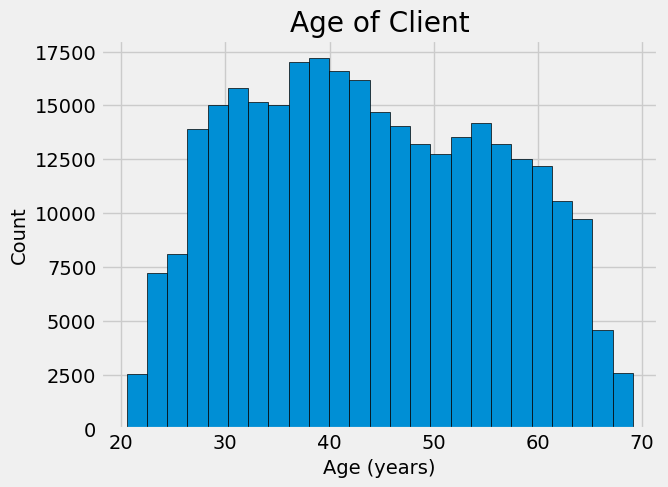

In [39]:
plt.style.use('fivethirtyeight')

plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

La répartition de la variable âge ne nous dit pas grand-chose, si ce n’est qu’il n’y a pas de valeurs aberrantes puisque tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite créer un [tracé d'estimation de la densité du noyau](https://www.techno-science.net/glossaire-definition/Estimation-par-noyau.html) (KDE) coloré par la valeur de la cible. Un [tracé d'estimation de la densité du noyau montre la distribution d'une seule variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement gaussien, à chaque point de données, puis en faisant la moyenne de tous les noyaux individuels pour développer une seule courbe lisse). Nous utiliserons `kdeplot` de seaborn pour ce graphique.

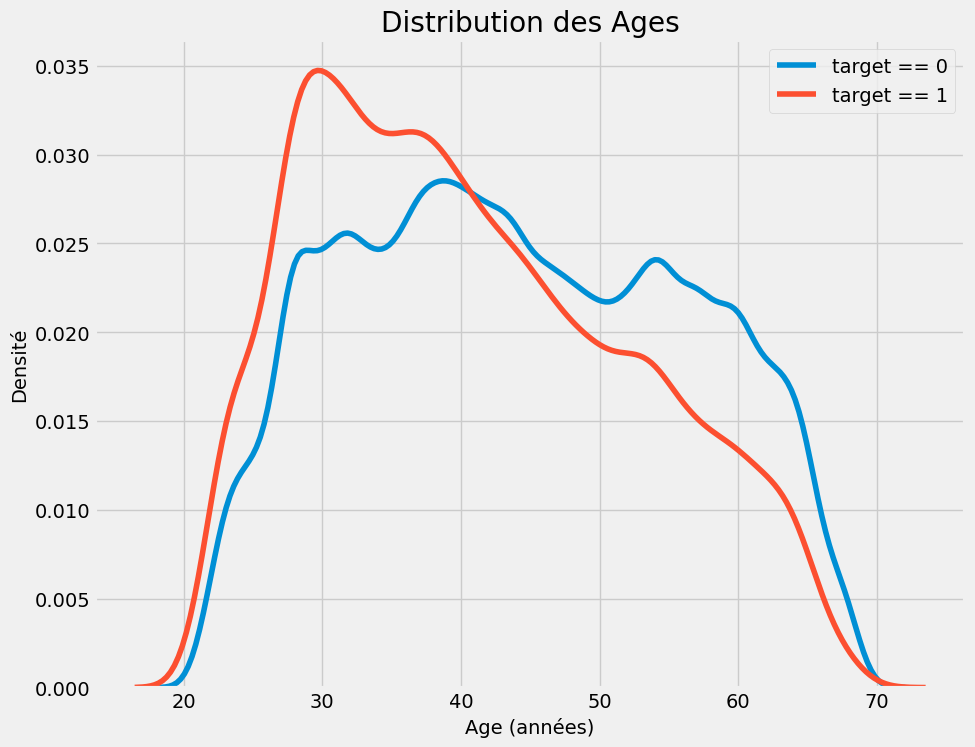

In [44]:
plt.figure(figsize = (10, 8))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.legend()
plt.xlabel('Age (années)'); 
plt.ylabel('Densité'); 
plt.title('Distribution des Ages');

La courbe TARGET == 1 est plus important sur l’extrémité gauche du graphique là ou se trouve  la population la plus jeune. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle de Machine Learning car elle affecte la `TARGET`. Examinons cette relation sous un autre angle : le non-remboursement moyen des prêts par tranche d'âge.

Pour réaliser ce graphique, nous découpons d’abord la catégorie d’âge en tranches de 5 ans chacune. Ensuite, pour chaque barplot, nous calculons la valeur moyenne de la cible, qui nous indique le ratio de prêts non remboursés dans chaque tranche d'âge.

In [45]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [46]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


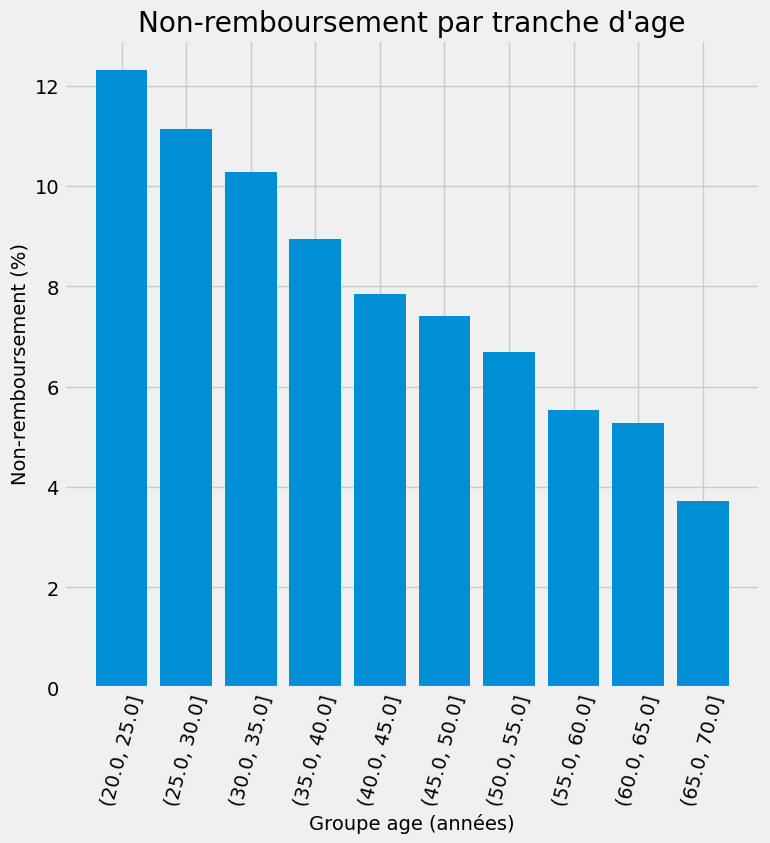

In [47]:
plt.figure(figsize = (8, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Groupe age (années)'); 
plt.ylabel('Non-remboursement (%)')
plt.title("Non-remboursement par tranche d'age");

Il y a une tendance claire : les clients les plus jeunes sont plus susceptibles de ne pas rembourser leur prêt. Le taux de non-remboursement est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus âgée.

Il s’agit d’informations qui pourraient être directement utilisées par la banque : étant donné que les clients plus jeunes sont moins susceptibles de rembourser le prêt, il faudrait peut-être leur fournir davantage de conseils en matière de planification financière. Cela ne signifie pas que la banque doit faire preuve de discrimination à l'égard des clients plus jeunes, mais il serait judicieux de prendre des mesures de précaution pour aider les jeunes clients à payer à temps.

### Exterior Sources
Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont `EXT_SOURCE_1`, `EXT_SOURCE_2` et `EXT_SOURCE_3`.
Selon la documentation, ces fonctionnalités représentent un "score normalisé provenant d'une source de données externe". Je ne suis pas sûr de ce que cela signifie exactement, mais il peut s'agir d'une sorte de notation de crédit cumulative établie à l'aide de nombreuses sources de données.

Analysons ces variables.

Tout d'abord, nous pouvons montrer les corrélations des variable `EXT_SOURCE` avec la `TARGET` et entre elles.

In [48]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


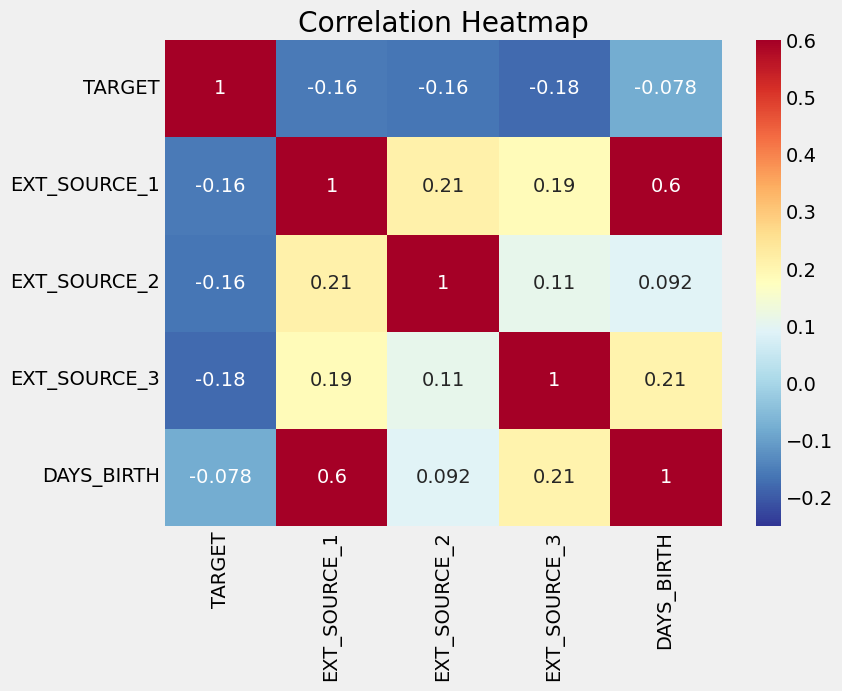

In [49]:
plt.figure(figsize = (8, 6))

sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois variables `EXT_SOURCE` ont des corrélations négatives avec la `TARGET`, ce qui indique qu'à mesure que la valeur de `EXT_SOURCE` augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que `DAYS_BIRTH` est positivement corrélé avec `EXT_SOURCE_1`, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

Nous pouvons ensuite examiner la distribution de chacune de ces variable colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la `TARGET`.

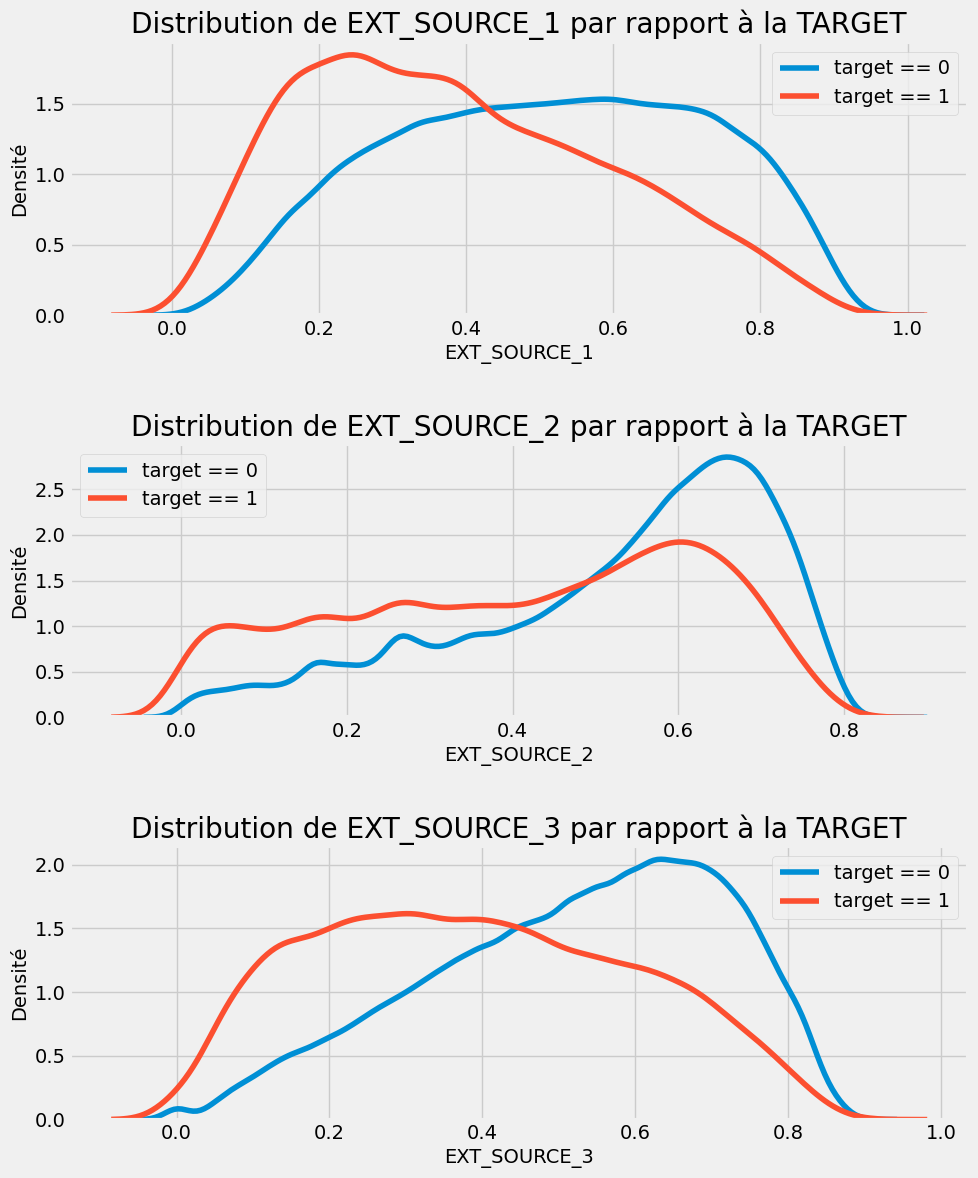

In [52]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # créer une nouveau graph pour chaque variable
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    plt.legend()

    plt.title('Distribution de %s par rapport à la TARGET' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)

`EXT_SOURCE_3` affiche la plus grande différence entre les valeurs de la `TARGET`. Nous pouvons clairement voir que cette variable a un certain lien avec la probabilité qu'un demandeur rembourse un prêt. La corrélation n'est pas très forte (en fait elles sont toutes [considérées comme très faibles](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), mais ces variables seront quand même utiles pour un modèle de Machine Learning pour prédire si un demandeur remboursera ou non un prêt à temps.

## Matrice à nuage
Pour terminer le travail exploratoire, nous pouvons créer une matrice à nuage des variables `EXT_SOURCE` et de la variable `DAYS_BIRTH`. La [matrice à nuage](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer une matrice, des nuages de points sur le triangle supérieur, des histogrammes sur la diagonale et des tracés de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur.

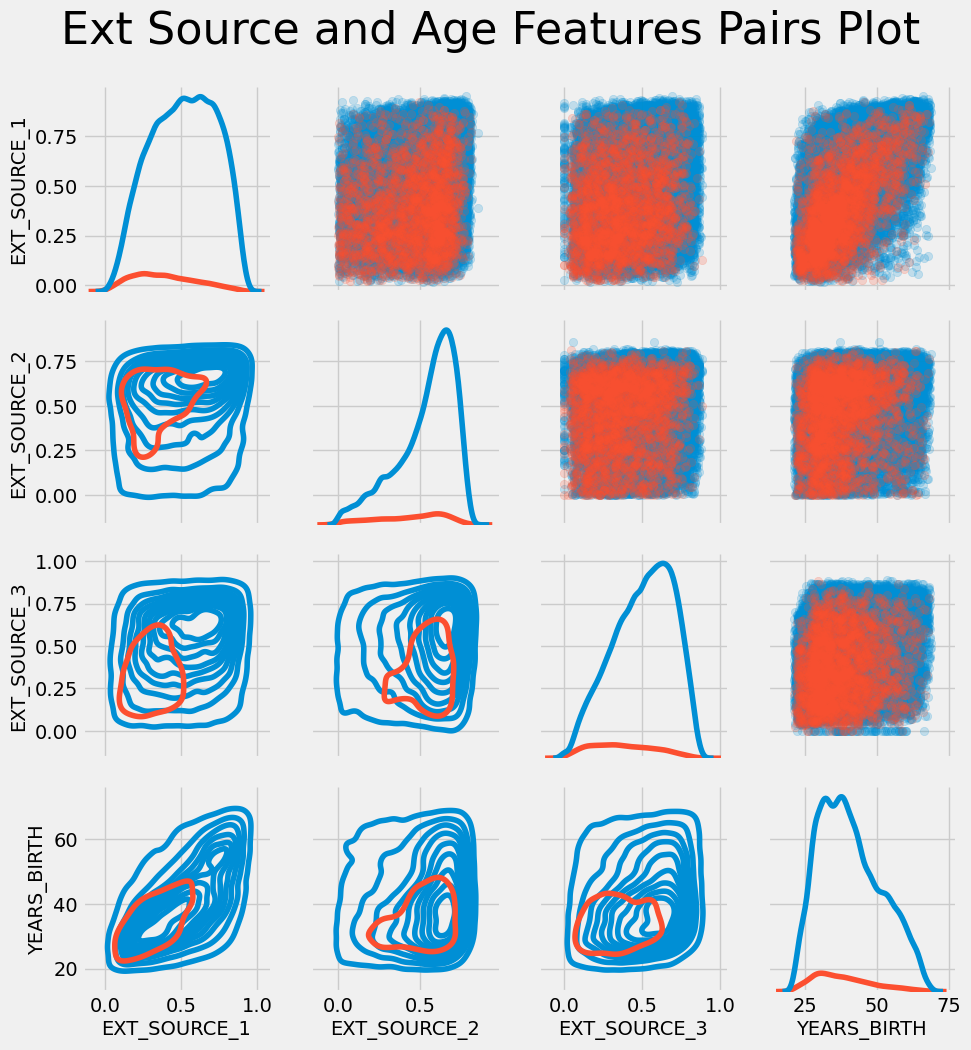

In [54]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
plt.legend()
plt.suptitle('Matice de nuage entre Ext Source et variable age', size = 32, y = 1.05);

Dans cette matrice, le rouge indique les prêts qui n’ont pas été remboursés et le bleu les prêts remboursés. Nous pouvons voir les différentes relations au sein des données. Il semble y avoir une relation linéaire positive modérée entre `EXT_SOURCE_1` et `DAYS_BIRTH` (ou de manière équivalente `YEARS_BIRTH`), indiquant que cette features peut prendre en compte l'âge du client.